In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [84]:
# Carregar o arquivo CSV
df = pd.read_csv('dadosclientes.csv') # importa base de dados

In [85]:
df.head()

,clientes,Valor_compra,qtde_produtos,forma_pag
0,cliente 2,378,10,1
1,cliente 5,475,18,1
2,cliente 1,285,10,1
3,cliente 1,181,4,0
4,cliente 7,177,20,1


In [86]:
# Separando os dados em X (características) e y (rótulos)
X = df[['Valor_compra', 'qtde_produtos']]  # Usaremos essas variáveis para prever
y = df['forma_pag']  # Este é o rótulo que queremos prever

In [87]:
# Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

In [88]:
# Criar o modelo SVM
model = SVC(kernel='linear') # cria modelo de support vector machine

In [89]:
#Treinando o modelo
model.fit(X_train,y_train) # treina o modelo de SVM

SVC(kernel='linear')

In [90]:
#Fazendo predições
y_prev = model.predict(X_test) #realiza predições

In [91]:
y_prev # exibe as previsões

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [92]:
X_test #exibe os dados de teste

,Valor_compra,qtde_produtos
95,429,7
15,407,10
30,436,10
158,292,9
128,20,9
115,346,19
69,472,10
170,195,7
174,487,16
45,284,15


In [93]:
acc = accuracy_score(y_test,y_prev)
acc

0.3

In [94]:
#matriz de confusão
cm = confusion_matrix(y_test,y_prev)
cm

array([[ 0, 42],
       [ 0, 18]])

In [95]:
prec = precision_score(y_test,y_prev)
prec

np.float64(0.3)

In [96]:
#Metrica F1
f1 = f1_score(y_test,y_prev)
f1

np.float64(0.46153846153846156)

In [97]:
# Fazendo previsões nos dados de teste
y_pred = model.predict(X_test)

In [98]:
#Classification report
relatorio = classification_report(y_test,y_prev,target_names=['0','1'])
print(relatorio)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.30      1.00      0.46        18

    accuracy                           0.30        60
   macro avg       0.15      0.50      0.23        60
weighted avg       0.09      0.30      0.14        60



C:\Users\gcosm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gcosm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gcosm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [99]:
df.shape #mostra dimensão da base de dados (Linha e Colunas)

(200, 4)

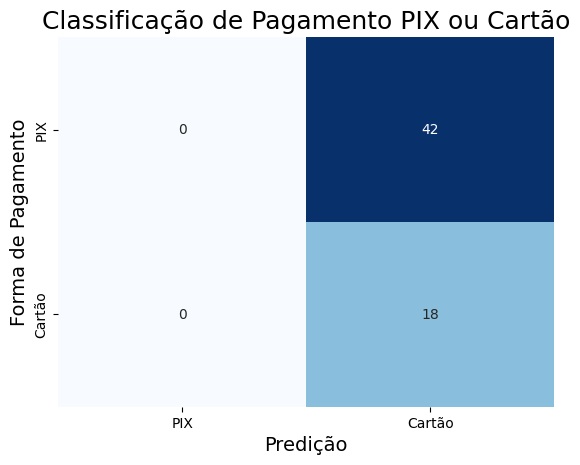

In [100]:
# Criar matriz de confusão visualmente
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['PIX','Cartão'],
            yticklabels=['PIX', 'Cartão'])
plt.title('Classificação de Pagamento PIX ou Cartão', fontsize=18)
plt.xlabel('Predição', fontsize=14)  # Define apenas um rótulo para o eixo X
plt.ylabel('Forma de Pagamento', fontsize=14)  # Eixo Y também com um único rótulo
plt.show()


C:\Users\gcosm\AppData\Local\Temp\ipykernel_15116\1968905018.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Cartão', 'PIX'], y=[non_spam_count, spam_count], palette='viridis') # palete cor do heat map


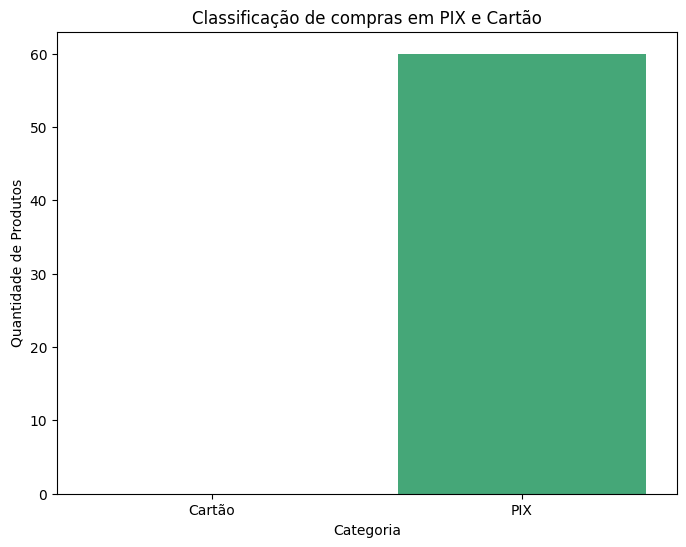

60
0


In [102]:
# Contagem de predições
spam_count = sum(y_prev)
non_spam_count = len(y_prev) - spam_count

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=['Cartão', 'PIX'], y=[non_spam_count, spam_count], palette='viridis') # palete cor do heat map
plt.xlabel('Clientes')
plt.ylabel('Quantidade de Produtos')
plt.title('Classificação de compras em PIX e Cartão')
plt.show()
print(spam_count)
print(non_spam_count)